# **Name: Shruti Bhavsar**

**LetsGrowMore- Virtual Internship Program**

***Intermediate Level Task***

**Task 3: Exploratory Data Analysis on Dataset - Terrorism**

Importing Modules

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from sklearn import tree
from os import system

Loading the Dataset

In [ ]:
data_terrorism = pd.read_csv('/content/globalterrorismdb_0718dist.csv', encoding='latin1')
data_terrorism.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [ ]:
data_terrorism.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
7311,197901090003,1979,1,9,NaN,0,NaN,138,Myanmar,5,Southeast Asia,Shan,Mong Tong,20.292237,98.895448,1,0,NaN,NaN,1,1,0,1,1.0,Insurgency/Guerilla Action,0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,4,Military,29.0,Military Unit/Patrol/Convoy,NaN,1st Kayah Rifles regiment,...,NaN,NaN,Automatic firearm,8.0,NaN,NaN,4.0,NaN,NaN,1.0,4.0,Unknown,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
7312,197901090004,1979,1,9,NaN,0,NaN,98,Italy,8,Western Europe,Lazio,Rome,41.890961,12.490069,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,NaN,Radio Future City (Citia Futura),...,NaN,NaN,Automatic firearm; Explosives,0.0,NaN,NaN,5.0,NaN,NaN,1.0,3.0,Minor (likely < $1 million),35000.0,NaN,1.0,4.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
7313,197901090007,1979,1,9,NaN,0,NaN,603,United Kingdom,8,Western Europe,Northern Ireland,Belfast,54.607712,-5.956210,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,3,Police,23.0,Police Patrol (including vehicles and convoys),NaN,police patrol,...,NaN,NaN,Rifle,0.0,NaN,NaN,1.0,NaN,NaN,1.0,4.0,Unknown,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,1.0,1.0,NaN
7314,197901100001,1979,1,10,NaN,0,NaN,98,Italy,8,Western Europe,Lazio,Rome,41.890961,12.490069,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,2,Government (General),15.0,Politician or Political Party Movement/Meeting...,NaN,Christian Demo Party HQ,...,NaN,NaN,Incendiary,1.0,NaN,NaN,0.0,NaN,NaN,1.0,4.0,Unknown,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
7315,197901100002,1979,1,10,NaN,0,NaN,98,Italy,8,Western Europe,Lazio,Rome,41.890961,12.490069,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,22,Violent Political Party,109.0,Party Official/Candidate/Other Personnel,Italian Social Movement (M,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_terrorism.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,gsubname2,gname3,gsubname3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,...,claimmode,claim2,claimmode2,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,7.316000e+03,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7133.000000,7133.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,924.000000,7316.000000,7316.000000,7316.0,7316.000000,18.000000,2.000000,7316.000000,6897.000000,7296.000000,109.000000,84.000000,94.000000,10.000000,7.000000,10.000000,0.0,0.0,0.0,7315.000000,11.000000,0.0,7315.000000,1845.000000,854.000000,...,215.000000,7.000000,6.000000,0.0,0.0,0.0,14.000000,7315.000000,5927.000000,325.000000,295.000000,19.000000,17.000000,3.000000,3.0,6507.000000,1144.000000,1145.000000,5273.000000,1119.000000,1072.000000,7315.000000,3448.000000,2.287000e+03,7190.000000,580.000000,580.000000,211.000000,185.000000,7098.000000,2.300000e+02,1.0,7.200000e+01,0.0,371.000000,280.000000,7315.000000,7315.000000,7315.000000,7315.000000
mean,1.975070e+11,1975.003417,6.523237,15.129579,0.029251,238.453390,5.899125,34.842112,-22.783191,1.139284,0.005467,0.997266,0.987015,0.909650,-1.257654,1.372294,0.064243,0.905686,0.0,3.236195,4.222222,3.000000,6.410197,38.516746,167.188596,9.807339,51.904762,213.202128,3.900000,33.000000,182.600000,NaN,NaN,NaN,0.024197,0.545455,NaN,0.002734,-33.888347,-83.175644,...,4.441860,0.857143,3.333333,NaN,NaN,NaN,0.357143,6.551606,11.912435,6.393846,11.542373,7.157895,11.176471,7.000000,16.0,0.785923,0.166958,0.234061,1.061255,0.388740,0.025187,0.550649,3.243039,1.354194e+05,0.080668,-1.463793,0.186207,-1.468009,35.929730,0.032544,6.014240e+06,20000.0,1.566266e+06,NaN,2.865229,6.428571,-3.135885,-3.064252,0.409706,-1.596719
std,2.676603e+08,2.675243,3.477868,9.053688,0.168521,194.540953,3.290733,22.248928,52.465516,0.700851,0.073745,0.052217,0.113218,0.286702,3.316879,0.639890,0.245202,0.292285,0.0,1.983729,2.462795,1.414214,5.890827,29.433240,77.622528,6.756995,27.205430,66.378449,4.148628,20.116328,58.621574,NaN,NaN,NaN,0.153670,0.522233,NaN,0.052221,50.888233,36.709206,...,2.920299,0.377964,3.265986,NaN,NaN,NaN,0.497245,2.113969,7.022859,1.681038,7.225997,2.544344,9.248211,1.732051,5.0,6.264323,1.079966,2.649593,7.851273,2.541234,0.245063,1.093145,0.469039,1.143578e+06,0.272343,66.295438,4.869256,15.685806,81.055942,0.177453,6.622020e+07,NaN,5.339688e+06,NaN,1.302037,24.729981,4.423057,4.486479,0.662392,4.131260
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-45.867889,-157.818968,1.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.0,1.000000,2.000000,2.000000,1.000000,1.000000,5.000000,1.000000,1.000000,30.000000,1.000000,8.000000,53.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,-99.000000,-99.000000,...,1.000000,0.000000,2.000000,NaN,NaN,NaN,0.000000,2.000000,1.000000,2.000000,2.000000,5.000000,2.000000,6.000000,11.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,2.000000,-9.900000e+01,0.000000,-99.000000,-99.000000,-99.000000,0.000000,0.000000,0.000000e+00,20000.0,0.000000e+00,NaN,2.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.973041e+11,1973.000000,3.000000,7.000000,0.000000,98.000000,2.000000,33.888523,-73.931351,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.0,2.000000,2.000000,2.500000,1.000000,15.000000

In [ ]:
data_terrorism.shape

(7316, 135)

In [ ]:
data_terrorism.dtypes

eventid         int64
iyear           int64
imonth          int64
iday            int64
approxdate     object
               ...   
INT_LOG       float64
INT_IDEO      float64
INT_MISC      float64
INT_ANY       float64
related        object
Length: 135, dtype: object

In [ ]:
data_terrorism.isnull().sum()

eventid          0
iyear            0
imonth           0
iday             0
approxdate    7300
              ... 
INT_LOG          1
INT_IDEO         1
INT_MISC         1
INT_ANY          1
related       6847
Length: 135, dtype: int64

In [ ]:
data_terrorism.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [ ]:
data_terrorism.rename(columns = {  'iyear':'Year', 'imonth':'Month', 'iday':'Day', 'country_txt':'Country', 'city':'City', 'region_txt':'Region', 'gname':'Group', 'motive':'Motive', 'nkill':'Kill', 'nwound':'Wound',
                       'summary':'Summary', 'target1':'Target1',  'attacktype1_txt':'attacktype1', 'weaptype1_txt':'weaptype1', 'targsubtype1_txt':'Targsubtype'}, inplace= True)

In [ ]:
data_terrorism.head(6)

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,Region,provstate,City,latitude,longitude,specificity,vicinity,location,Summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,Targsubtype,corp1,Target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,Kill,nkillus,nkillter,Wound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,0,NaN,NaN,1,1,1,-9,NaN,NaN,0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,North America,Illinois,Cairo,37.005105,-89.176269,1,0,NaN,1/1/1970: Unknown African American assailants ...,1,1,1,0,NaN,NaN,0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,3,Police,22.0,"Police Building (headquarters, station, school)",Cairo Police Department,Cairo Police Headquarters,...,NaN,NaN,Several gunshots were fired.,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,Minor (likely < $1 million),NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9.0,-9.0,0.0,-9.0,NaN


In [ ]:
data_terrorism.isnull().sum()

eventid          0
Year             0
Month            0
Day              0
approxdate    7300
              ... 
INT_LOG          1
INT_IDEO         1
INT_MISC         1
INT_ANY          1
related       6847
Length: 135, dtype: int64

In [ ]:
data_terrorism_new= data_terrorism[['Year','Month','Day','Country','City','Region','Group','Motive','Kill','Wound','Summary','Target1', 'attacktype1','weaptype1', 'Targsubtype']]
data_terrorism_new.head()

,Year,Month,Day,Country,City,Region,Group,Motive,Kill,Wound,Summary,Target1,attacktype1,attacktype1,weaptype1,weaptype1,Targsubtype
0,1970,7,2,Dominican Republic,Santo Domingo,Central America & Caribbean,MANO-D,NaN,1.0,0.0,NaN,Julio Guzman,1,Assassination,13.0,Unknown,Named Civilian
1,1970,0,0,Mexico,Mexico city,North America,23rd of September Communist League,NaN,0.0,0.0,NaN,"Nadine Chaval, daughter",6,Hostage Taking (Kidnapping),13.0,Unknown,"Diplomatic Personnel (outside of embassy, cons..."
2,1970,1,0,Philippines,Unknown,Southeast Asia,Unknown,NaN,1.0,0.0,NaN,Employee,1,Assassination,13.0,Unknown,Radio Journalist/Staff/Facility
3,1970,1,0,Greece,Athens,Western Europe,Unknown,NaN,NaN,NaN,NaN,U.S. Embassy,3,Bombing/Explosion,6.0,Explosives,Embassy/Consulate
4,1970,1,0,Japan,Fukouka,East Asia,Unknown,NaN,NaN,NaN,NaN,U.S. Consulate,7,Facility/Infrastructure Attack,8.0,Incendiary,Embassy/Consulate


In [ ]:
data_terrorism_new.shape

(7316, 17)

In [ ]:
data_terrorism_new.isnull().sum()/len(data_terrorism_new)*100

Year            0.000000
Month           0.000000
Day             0.000000
Country         0.000000
City            0.000000
Region          0.000000
Group           0.013669
Motive         91.921815
Kill           11.057955
Wound          27.925096
Summary        88.313286
Target1         0.902132
attacktype1     0.000000
attacktype1     0.000000
weaptype1       0.013669
weaptype1       0.013669
Targsubtype     5.727173
dtype: float64

In [ ]:
data_terrorism_new.drop(['Summary', 'Motive'], axis=1,inplace=True)

In [ ]:
data_terrorism_new

,Year,Month,Day,Country,City,Region,Group,Kill,Wound,Target1,attacktype1,attacktype1,weaptype1,weaptype1,Targsubtype
0,1970,7,2,Dominican Republic,Santo Domingo,Central America & Caribbean,MANO-D,1.0,0.0,Julio Guzman,1,Assassination,13.0,Unknown,Named Civilian
1,1970,0,0,Mexico,Mexico city,North America,23rd of September Communist League,0.0,0.0,"Nadine Chaval, daughter",6,Hostage Taking (Kidnapping),13.0,Unknown,"Diplomatic Personnel (outside of embassy, cons..."
2,1970,1,0,Philippines,Unknown,Southeast Asia,Unknown,1.0,0.0,Employee,1,Assassination,13.0,Unknown,Radio Journalist/Staff/Facility
3,1970,1,0,Greece,Athens,Western Europe,Unknown,NaN,NaN,U.S. Embassy,3,Bombing/Explosion,6.0,Explosives,Embassy/Consulate
4,1970,1,0,Japan,Fukouka,East Asia,Unknown,NaN,NaN,U.S. Consulate,7,Facility/Infrastructure Attack,8.0,Incendiary,Embassy/Consulate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7311,1979,1,9,Myanmar,Mong Tong,Southeast Asia,People's Army (Myanmar),8.0,4.0,1st Kayah Rifles regiment,2,Armed Assault,5.0,Firearms,Military Unit/Patrol/Convoy
7312,1979,1,9,Italy,Rome,Western Europe,Armed Revolutionary Nuclei (NAR),0.0,5.0,Radio Future City (Citia Futura),6,Hostage Taking (Kidnapping),5.0,Firearms,Radio Journalist/Staff/Facility
7313,1979,1,9,United Kingdom,Belfast,Western Europe,Irish Republican Army (IRA),0.0,1.0,police patrol,2,Armed Assault,5.0,Firearms,Police Patrol (including vehicles and convoys)
7314,1979,1,10,Italy,Rome,Western Europe,Italian Social Movement (MSI),1.0,0.0,Christian Demo Party HQ,7,Facility/Infrastructure Attack,8.0,Incendiary,Politician or Political Party Movement/Meeting...


In [ ]:
data_terrorism_new.isnull().sum()

Year              0
Month             0
Day               0
Country           0
City              0
Region            0
Group             1
Kill            809
Wound          2043
Target1          66
attacktype1       0
attacktype1       0
weaptype1         1
weaptype1         1
Targsubtype     419
dtype: int64

In [ ]:
data_terrorism_new['City'].fillna(value='Not specified', inplace=True)
data_terrorism_new['Target1'].fillna(value='Unknown', inplace=True)
data_terrorism_new['Targsubtype'].fillna(value='Not specified', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
print(data_terrorism_new['Kill'].mode())
print(data_terrorism_new['Wound'].mode())

0    0.0
dtype: float64
0    0.0
dtype: float64


In [ ]:
data_terrorism_new['Kill']= data_terrorism_new['Kill'].fillna(0)
data_terrorism_new['Wound'] = data_terrorism_new['Wound'].fillna(0)

In [ ]:
data_terrorism_new.isnull().sum()

Year             0
Month            0
Day              0
Country          0
City             0
Region           0
Group            1
Kill             0
Wound            0
Target1         66
attacktype1      0
attacktype1      0
weaptype1        1
weaptype1        1
Targsubtype    419
dtype: int64

**Data Visualization**

In [ ]:
data_terrorism_new['Year'].value_counts().sort_index()

1970     651
1971     471
1972     568
1973     473
1974     581
1975     740
1976     923
1977    1319
1978    1526
1979      64
Name: Year, dtype: int64

**Terrorist Activities Each Year**

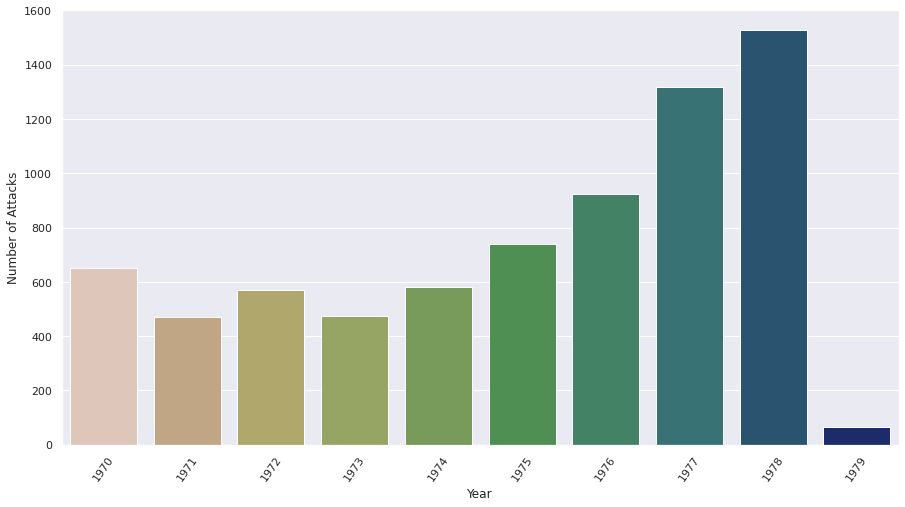

In [ ]:
Year = data_terrorism_new['Year'].unique()
count_of_years = data_terrorism_new['Year'].value_counts().sort_index()
plt.figure(figsize=(15,8))
sns.barplot(x= Year, y= count_of_years, palette= 'gist_earth_r')
plt.xticks(rotation = 55)
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.show()

In [ ]:
data_terrorism_new.groupby(['Region']).count()['Kill']

Region
Australasia & Oceania            15
Central America & Caribbean     325
East Asia                        63
Eastern Europe                   25
Middle East & North Africa      639
North America                  1517
South America                   778
South Asia                       17
Southeast Asia                  116
Sub-Saharan Africa              120
Western Europe                 3701
Name: Kill, dtype: int64

Text(0, 0.5, 'Casualities')

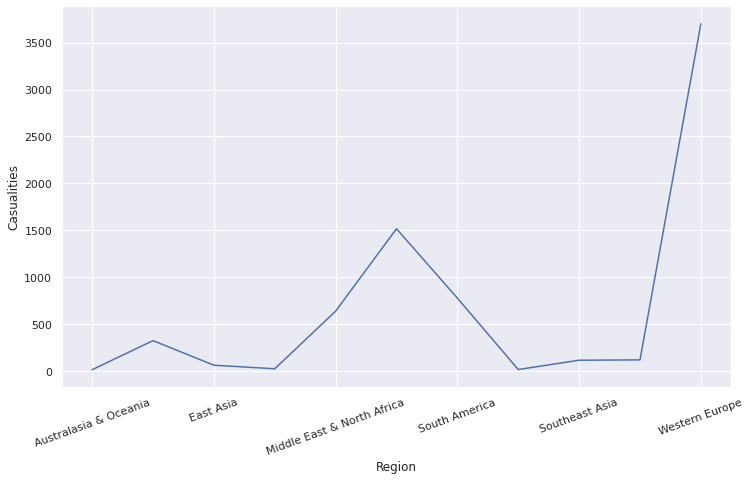

In [ ]:
plt.subplots(figsize=(12,7))
data_terrorism_new.groupby(['Region']).count()['Kill'].plot()
plt.xticks(rotation=20)
plt.ylabel('Casualities')

In [ ]:
data_terrorism_new.groupby(['Region']).count()['Wound']

Region
Australasia & Oceania            15
Central America & Caribbean     325
East Asia                        63
Eastern Europe                   25
Middle East & North Africa      639
North America                  1517
South America                   778
South Asia                       17
Southeast Asia                  116
Sub-Saharan Africa              120
Western Europe                 3701
Name: Wound, dtype: int64

Text(0, 0.5, 'casualities')

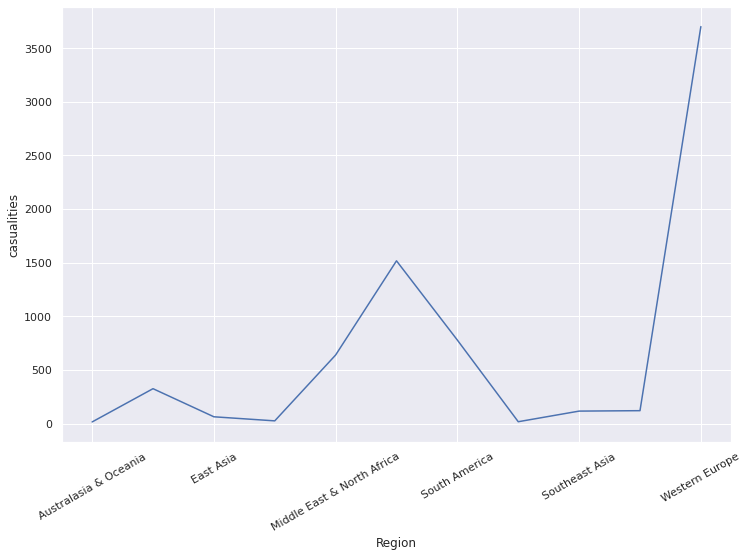

In [ ]:
plt.subplots(figsize=(12,8))
data_terrorism_new.groupby(['Region']).count()['Wound'].plot()
plt.xticks(rotation=30)
plt.ylabel('casualities')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


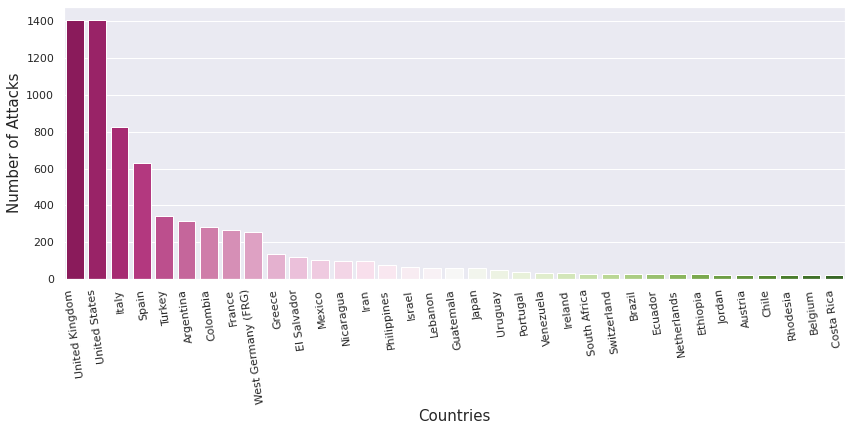

In [ ]:
plt.subplots(figsize=(14,5))
sns.countplot('Country', data=data_terrorism_new, palette='PiYG', order=data_terrorism_new['Country'].value_counts()[:35].index)
plt.xticks(rotation=98)
plt.xlabel('Countries', fontsize=15)
plt.ylabel('Number of Attacks', fontsize=15)
plt.show()